In [1]:
%matplotlib notebook
import netCDF4 as nc
import numpy as np
import xie_liu as xl
import matplotlib.pyplot as plt

In [2]:
root = nc.Dataset("dados/maoradflux1long/maoradflux1longM1.c2.20140223.040000.nc", "r")

In [3]:
    dataset = root
    cf = dataset["cloudfraction_longwave"][:]
    base_time = dataset["base_time"][0]
    time_offset = dataset["time_offset"][:]
    time = (time_offset) / (60 * 60)
    Fdn_clr = dataset["clearsky_downwelling_shortwave"][:]
    Fdn_all = dataset["downwelling_shortwave"][:]
    Fup_all = dataset["upwelling_shortwave"][:]
    Fdn_clr_d = dataset["clearsky_diffuse_downwelling_shortwave"][:]
    Fdn_all_d = dataset["direct_downwelling_shortwave"][:]
    T = dataset["cloud_transmissivity_shortwave"][:]

In [4]:
(B1, B2) = xl.get_B(Fdn_clr, Fdn_all, Fup_all, Fdn_clr_d, Fdn_all_d, T)

In [5]:
Bup = Fdn_clr - Fdn_all
Bdo = Fdn_clr - Fup_all * T * T

<IPython.core.display.Javascript object>


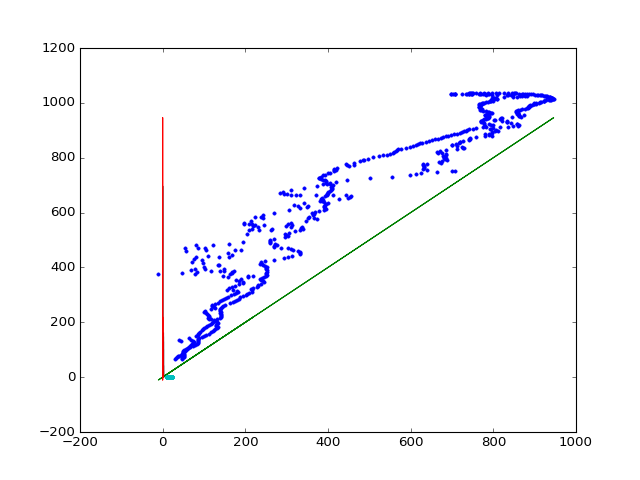

In [6]:
plt.plot(Bup, Bdo, '.')
plt.plot(Bup, Bup)
plt.plot(np.zeros(len(Bup)), Bup)
plt.show()

In [7]:
plt.plot(time, B1, '.')
plt.show()

In [8]:
B1[B1 > 1]

masked_array(data = [-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- --],
             mask = [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True],
       fill_value = -9999.0)

In [9]:
alfa = xl.get_cloud_albedo(B1, B2)

In [10]:
plt.hist(B1, range=(0,1))

(array([ 697.,   11.,   11.,   25.,   46.,  150.,  130.,  102.,  163.,   44.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

In [15]:
np.max(alfa)

0

In [12]:
B1[400]

0.68724734

In [13]:
B2[400]

1.0

In [32]:
xl.get_cloud_albedo(0.05, 0.6)

array(0.03779629731821636)

In [31]:
0.05 / 0.6

0.08333333333333334